# 图像基础

导入相应的包：

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

![臭虫](stinkbug.png)

## 导入图像

我们首先导入上面的图像，注意 `matplotlib` 默认只支持 `PNG` 格式的图像，我们可以使用 `mpimg.imread` 方法读入这幅图像：

In [2]:
img = mpimg.imread('stinkbug.png')

In [3]:
img.shape

(375, 500, 3)

这是一个 `375 x 500 x 3` 的 `RGB` 图像，并且每个像素使用 uint8 分别表示 `RGB` 三个通道的值。不过在处理的时候，`matplotlib` 将它们的值归一化到 `0.0~1.0` 之间：

In [4]:
img.dtype

dtype('float32')

## 显示图像

使用 `plt.imshow()` 可以显示图像：

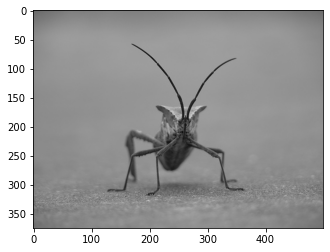

In [5]:
imgplot = plt.imshow(img)

## 伪彩色图像

从单通道模拟彩色图像：

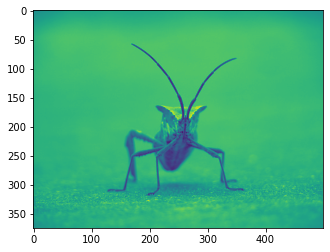

In [6]:
lum_img = img[:,:,0]
imgplot = plt.imshow(lum_img)

## 改变 colormap

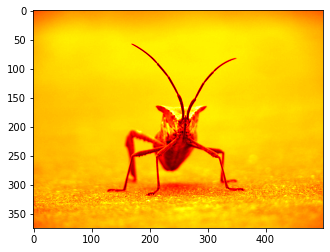

In [7]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('hot')

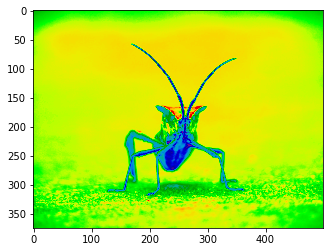

In [8]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

显示色度条：

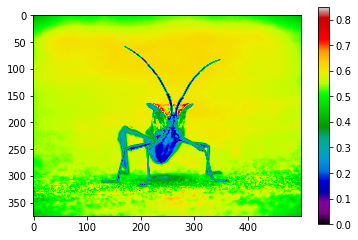

In [9]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')
plt.colorbar()
plt.show()

## 限制显示范围

先查看直方图：

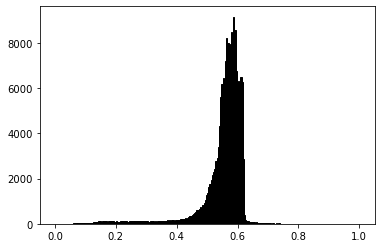

In [10]:
plt.hist(lum_img.flatten(), 256, range=(0.0,1.0), fc='k', ec='k')
plt.show()

将显示范围设为 `0.0-0.7`：

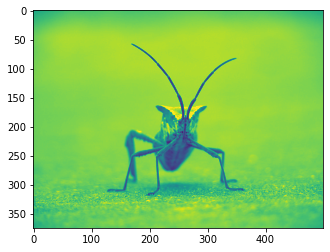

In [11]:
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0,0.7)

## resize 操作

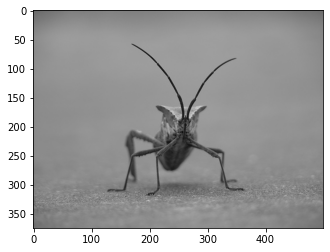

In [12]:
from PIL import Image
img = Image.open('stinkbug.png')
rsize = img.resize((img.size[0],img.size[1]))
rsizeArr = np.asarray(rsize) 
imgplot = plt.imshow(rsizeArr)

上面我们将这个图像使用 PIL 的 `Image` 对象导入，并将其 `resize` 为原来的 1/100，可以看到很多细节都丢失了。

在画图时，由于画面的大小与实际像素的大小可能不一致，所以不一致的地方会进行插值处理，尝试一下不同的插值方法：

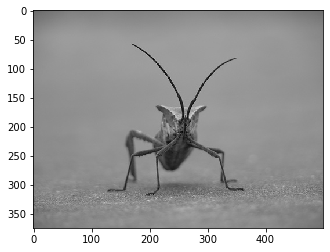

In [13]:
imgplot = plt.imshow(rsizeArr)
imgplot.set_interpolation('nearest')

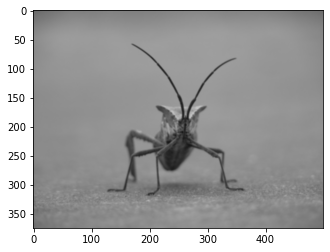

In [14]:
imgplot = plt.imshow(rsizeArr)
imgplot.set_interpolation('bicubic')